In [6597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression

In [6598]:
df = pd.read_csv("https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_forecasts.csv")
df

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.53049,2022-12-14 20:56:18 UTC
1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.46951,2022-12-14 20:56:18 UTC
2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.00000,1.00000,0.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,2022-12-14 20:56:18 UTC
3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.00000,2.00000,0.00000,3.00000,...,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,2022-12-14 20:56:18 UTC
4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.00000,1.00000,0.00000,7.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,2022-12-14 20:56:18 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-11-16 16:00:55 UTC,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-12-14 20:56:18 UTC
220,2022-11-16 16:00:55 UTC,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-14 20:56:18 UTC
221,2022-11-16 16:00:55 UTC,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-12-14 20:56:18 UTC
222,2022-11-16 16:00:55 UTC,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-12-14 20:56:18 UTC


In [6599]:
dfteam1 = df.drop_duplicates(subset="team", keep = "first").reset_index()
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC


In [6600]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored"]], dfteam1["win_league"])
dfteam1["predict_results"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657


In [6601]:
dfcandidate = dfteam1.sort_values("predict_results", ascending = False)
dfcandidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.068155
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.063969
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062222


In [6602]:
dfA16 = dfcandidate[df.group == "A"].head(n = 2)
dfA16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1248350719.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfA16 = dfcandidate[df.group == "A"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.057657


In [6603]:
dfB16 = dfcandidate[df.group == "B"].head(n = 2)
dfB16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2245931670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB16 = dfcandidate[df.group == "B"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642
12,12,2022-12-14 20:55:37 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.023092


In [6604]:
dfC16 = dfcandidate[df.group == "C"].head(n = 2)
dfC16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2619915074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfC16 = dfcandidate[df.group == "C"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
21,21,2022-12-14 20:55:37 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.025025


In [6605]:
dfD16 = dfcandidate[df.group == "D"].head(n = 2)
dfD16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3568035520.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfD16 = dfcandidate[df.group == "D"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.029704


In [6606]:
dfE16 = dfcandidate[df.group == "E"].head(n = 2)
dfE16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3174875314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfE16 = dfcandidate[df.group == "E"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


In [6607]:
dfF16 = dfcandidate[df.group == "F"].head(n = 2)
dfF16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2577019320.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfF16 = dfcandidate[df.group == "F"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799
22,22,2022-12-14 20:55:37 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.045251


In [6608]:
dfG16 = dfcandidate[df.group == "G"].head(n = 2)
dfG16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1284428377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfG16 = dfcandidate[df.group == "G"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969


In [6609]:
dfH16 = dfcandidate[df.group == "H"].head(n = 2)
dfH16

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3074301813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfH16 = dfcandidate[df.group == "H"].head(n = 2)


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848


In [6610]:
dfAwinners = dfA16.sort_values("predict_results", ascending = False).head(n = 1)
dfAwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007


In [6611]:
dfARunners_up = dfA16.sort_values("predict_results").head(n = 1)
dfARunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.057657


In [6612]:
dfBwinners = dfB16.sort_values("predict_results", ascending = False).head(n = 1)
dfBwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642


In [6613]:
dfBRunners_up = dfB16.sort_values("predict_results").head(n = 1)
dfBRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
12,12,2022-12-14 20:55:37 UTC,USA,B,73.394,1.95077,0.6716,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.023092


In [6614]:
dfCwinners = dfC16.sort_values("predict_results", ascending = False).head(n = 1)
dfCwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994


In [6615]:
dfCRunners_up = dfC16.sort_values("predict_results").head(n = 1)
dfCRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
21,21,2022-12-14 20:55:37 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.025025


In [6616]:
dfDwinners = dfD16.sort_values("predict_results", ascending = False).head(n = 1)
dfDwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


In [6617]:
dfDRunners_up = dfD16.sort_values("predict_results").head(n = 1)
dfDRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.029704


In [6618]:
dfEwinners = dfE16.sort_values("predict_results", ascending = False).head(n = 1)
dfEwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155


In [6619]:
dfERunners_up = dfE16.sort_values("predict_results").head(n = 1)
dfERunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


In [6620]:
dfFwinners = dfF16.sort_values("predict_results", ascending = False).head(n = 1)
dfFwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799


In [6621]:
dfFRunners_up = dfF16.sort_values("predict_results").head(n = 1)
dfFRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
22,22,2022-12-14 20:55:37 UTC,Belgium,F,80.919,2.439,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.045251


In [6622]:
dfGwinners = dfG16.sort_values("predict_results", ascending = False).head(n = 1)
dfGwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


In [6623]:
dfGRunners_up = dfG16.sort_values("predict_results").head(n = 1)
dfGRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969


In [6624]:
dfHwinners = dfH16.sort_values("predict_results", ascending = False).head(n = 1)
dfHwinners

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146


In [6625]:
dfHRunners_up = dfH16.sort_values("predict_results").head(n = 1)
dfHRunners_up

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848


In [6626]:
frame1 = [dfAwinners, dfBRunners_up]
RoundOf16Game1_December3 = pd.concat(frame1)
RoundOf16Game1_December3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007
12,12,2022-12-14 20:55:37 UTC,USA,B,73.39400,1.95077,0.6716,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.023092


<AxesSubplot: xlabel='team'>

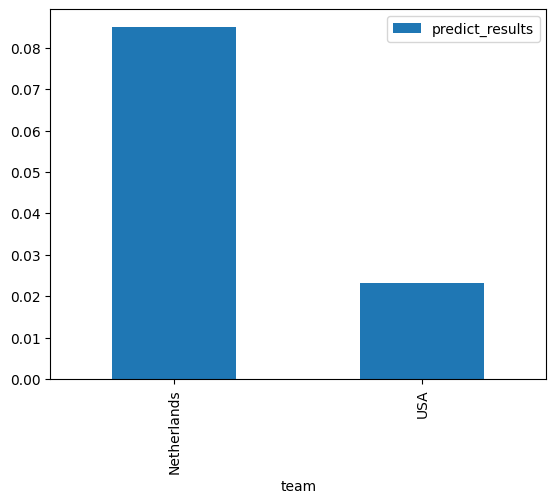

In [6627]:
RoundOf16Game1_December3.reset_index().plot.bar(x="team", y="predict_results")

In [6628]:
WinnersOfMatch49 = RoundOf16Game1_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch49

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007


In [6629]:
frame2 = [dfCwinners, dfDRunners_up]
RoundOf16Game2_December3 = pd.concat(frame2)
RoundOf16Game2_December3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.029704


<AxesSubplot: xlabel='team'>

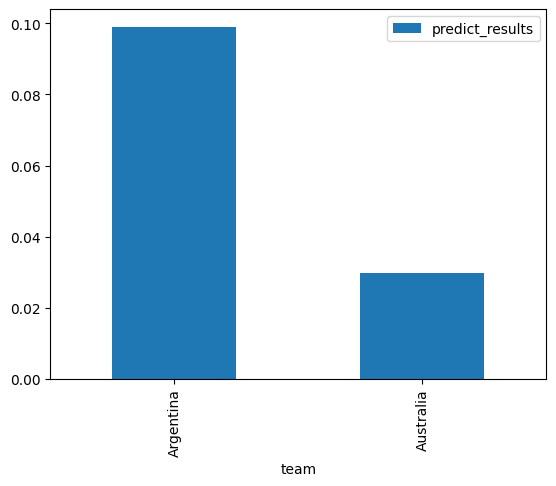

In [6630]:
RoundOf16Game2_December3.reset_index().plot.bar(x="team", y="predict_results")

In [6631]:
WinnersOfMatch50 = RoundOf16Game2_December3.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch50

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994


In [6632]:
frame3 = [dfEwinners, dfFRunners_up]
RoundOf16Game1_December5 = pd.concat(frame3)
RoundOf16Game1_December5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155
22,22,2022-12-14 20:55:37 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.045251


<AxesSubplot: xlabel='team'>

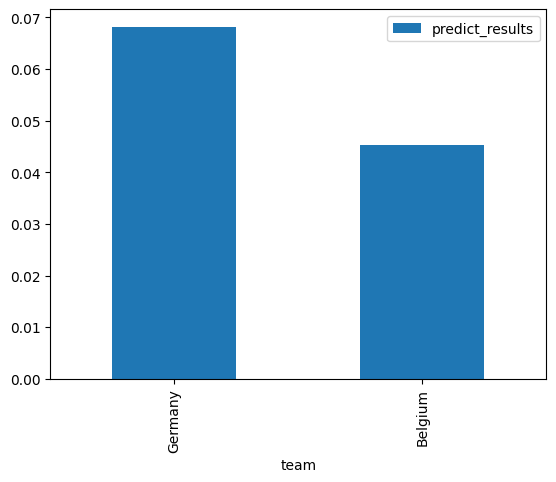

In [6633]:
RoundOf16Game1_December5.reset_index().plot.bar(x="team", y="predict_results")

In [6634]:
WinnersOfMatch53 = RoundOf16Game1_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch53

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155


In [6635]:
frame4 = [dfGwinners, dfHRunners_up]
RoundOf16Game2_December5 = pd.concat(frame4)
RoundOf16Game2_December5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848


<AxesSubplot: xlabel='team'>

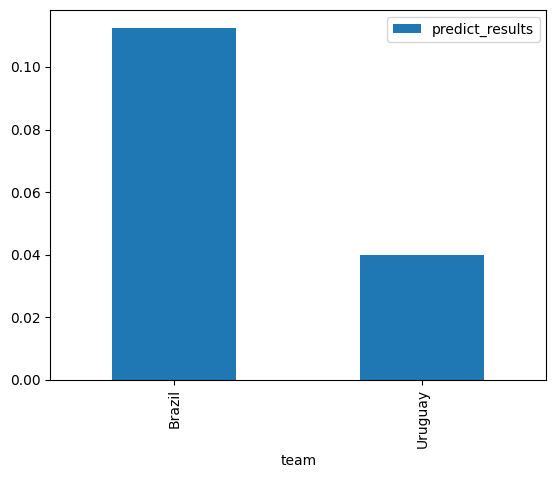

In [6636]:
RoundOf16Game2_December5.reset_index().plot.bar(x="team", y="predict_results")

In [6637]:
WinnersOfMatch54 = RoundOf16Game2_December5.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch54


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


In [6638]:
frame5 = [dfBwinners, dfARunners_up]
RoundOf16Game1_December4 = pd.concat(frame5)
RoundOf16Game1_December4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.057657


<AxesSubplot: xlabel='team'>

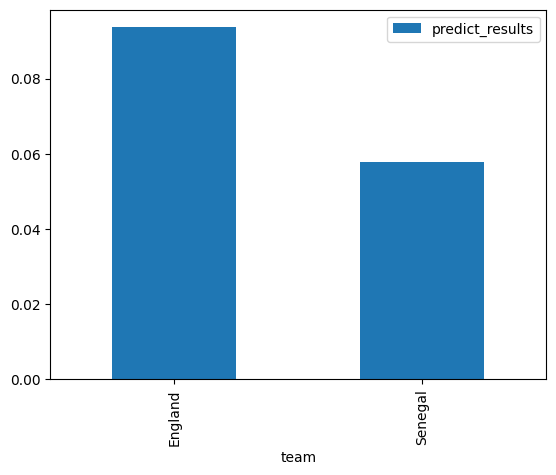

In [6639]:
RoundOf16Game1_December4.reset_index().plot.bar(x="team", y="predict_results")

In [6640]:
WinnersOfMatch51 = RoundOf16Game1_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch51

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642


In [6641]:
frame6 = [dfDwinners, dfCRunners_up]
RoundOf16Game2_December4 = pd.concat(frame6)
RoundOf16Game2_December4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
21,21,2022-12-14 20:55:37 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.025025


<AxesSubplot: xlabel='team'>

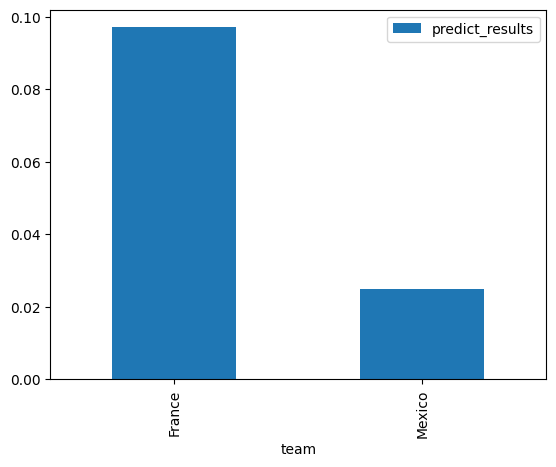

In [6642]:
RoundOf16Game2_December4.reset_index().plot.bar(x="team", y="predict_results")


In [6643]:
WinnersOfMatch52 = RoundOf16Game2_December4.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch52

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


In [6644]:
frame7 = [dfFwinners, dfERunners_up]
RoundOf16Game1_December6 = pd.concat(frame7)
RoundOf16Game1_December6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


<AxesSubplot: xlabel='team'>

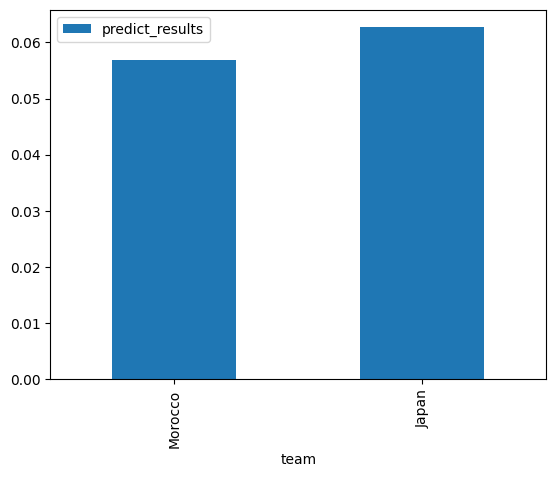

In [6645]:
RoundOf16Game1_December6.reset_index().plot.bar(x="team", y="predict_results")

In [6646]:
WinnersOfMatch55 = RoundOf16Game1_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch55

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


In [6647]:
frame8 = [dfHwinners, dfGRunners_up]
RoundOf16Game2_December6 = pd.concat(frame8)
RoundOf16Game2_December6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969


<AxesSubplot: xlabel='team'>

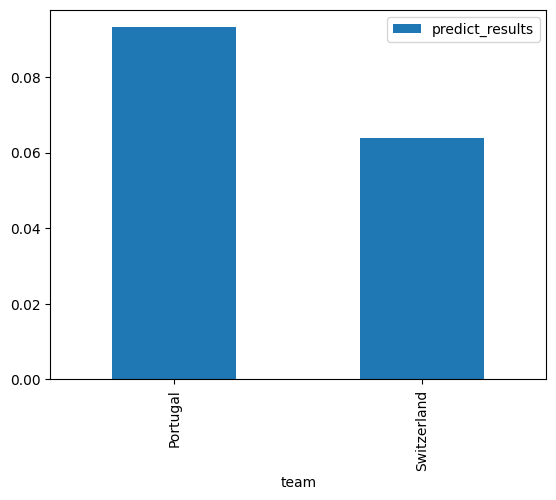

In [6648]:
RoundOf16Game2_December6.reset_index().plot.bar(x="team", y="predict_results")

In [6649]:
WinnersOfMatch56 = RoundOf16Game2_December6.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch56

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146


In [6650]:
frame9 = [WinnersOfMatch49, WinnersOfMatch50]
QuaterFinalsGame1_December9 = pd.concat(frame9)
QuaterFinalsGame1_December9 

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994


<AxesSubplot: xlabel='team'>

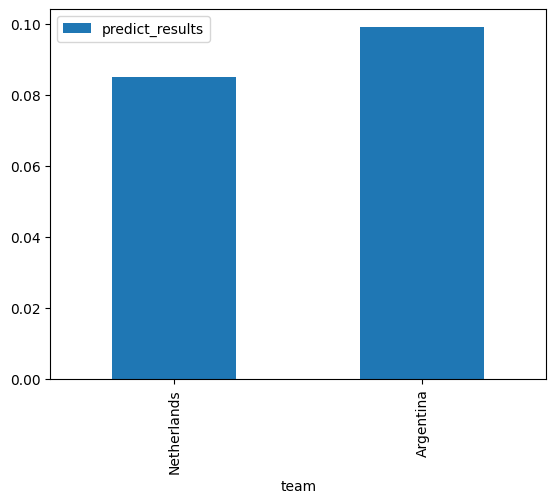

In [6651]:
QuaterFinalsGame1_December9.reset_index().plot.bar(x="team", y="predict_results")

In [6652]:
WinnersOfMatch57 = QuaterFinalsGame1_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch57

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994


In [6653]:
frame10 = [WinnersOfMatch53, WinnersOfMatch54]
QuaterFinalsGame2_December9 = pd.concat(frame10)
QuaterFinalsGame2_December9 

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


<AxesSubplot: xlabel='team'>

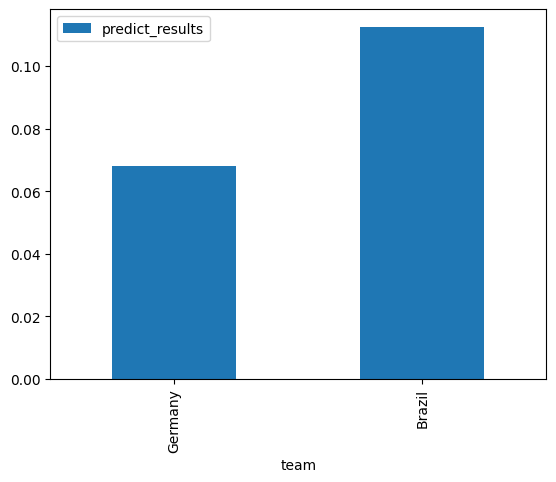

In [6654]:
QuaterFinalsGame2_December9.reset_index().plot.bar(x="team", y="predict_results")

In [6655]:
WinnersOfMatch58 = QuaterFinalsGame2_December9.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch58

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


In [6656]:
frame11 = [WinnersOfMatch51, WinnersOfMatch52]
QuaterFinalsGame1_December10 = pd.concat(frame11)
QuaterFinalsGame1_December10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


<AxesSubplot: xlabel='team'>

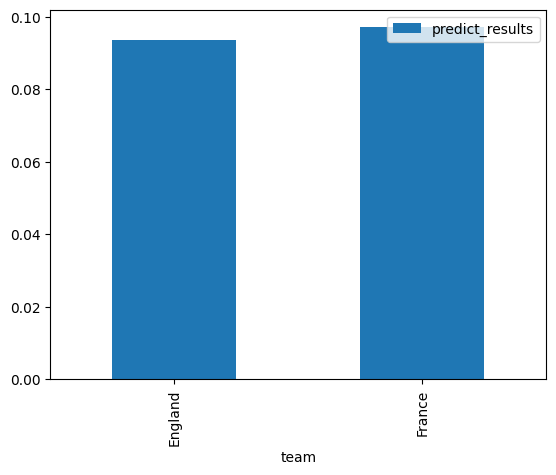

In [6657]:
QuaterFinalsGame1_December10.reset_index().plot.bar(x="team", y="predict_results")


In [6658]:
WinnersOfMatch59 = QuaterFinalsGame1_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch59

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


In [6659]:
frame12 = [WinnersOfMatch55, WinnersOfMatch56]
QuaterFinalsGame2_December10 = pd.concat(frame12)
QuaterFinalsGame2_December10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146


<AxesSubplot: xlabel='team'>

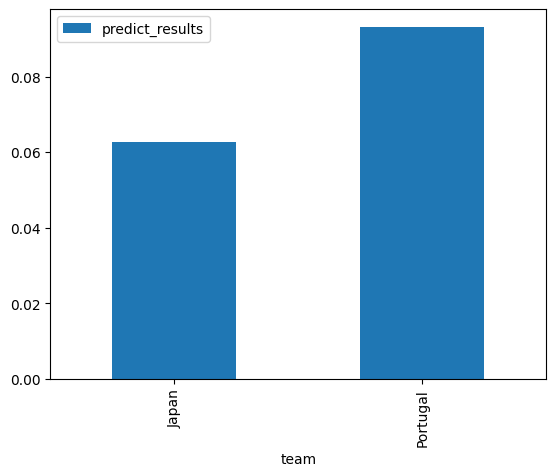

In [6660]:
QuaterFinalsGame2_December10.reset_index().plot.bar(x="team", y="predict_results")

In [6661]:
WinnersOfMatch60 = QuaterFinalsGame2_December10.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch60

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146


In [6662]:
frame13 = [WinnersOfMatch57, WinnersOfMatch58]
SemiFinalsGame1_December13 = pd.concat(frame13)
SemiFinalsGame1_December13

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603


<AxesSubplot: xlabel='team'>

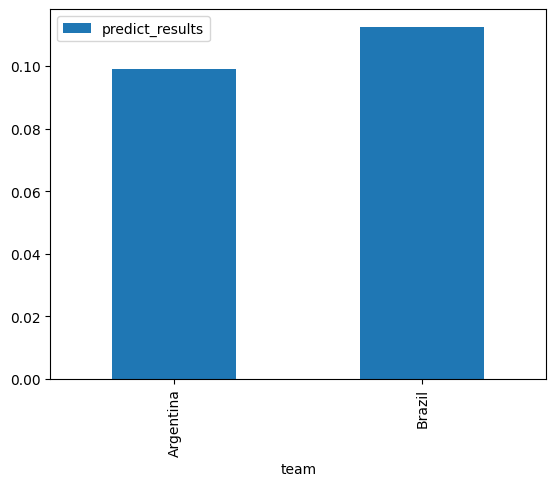

In [6663]:
SemiFinalsGame1_December13.reset_index().plot.bar(x="team", y="predict_results")

In [6664]:
WinnersOfMatch61 = SemiFinalsGame1_December13.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch61

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


In [6665]:
frame14 = [WinnersOfMatch59, WinnersOfMatch60]
SemiFinalsGame1_December14 = pd.concat(frame14)
SemiFinalsGame1_December14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146


<AxesSubplot: xlabel='team'>

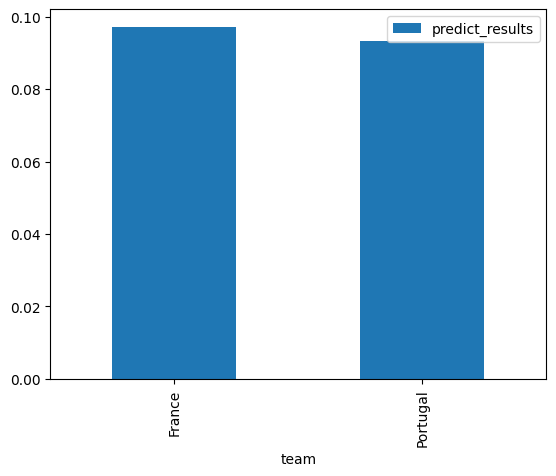

In [6666]:
SemiFinalsGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [6667]:
WinnersOfMatch62 = SemiFinalsGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfMatch62

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


In [6668]:
frame15 = [WinnersOfMatch61, WinnersOfMatch62]
FinalGame1_December14 = pd.concat(frame15)
FinalGame1_December14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127


<AxesSubplot: xlabel='team'>

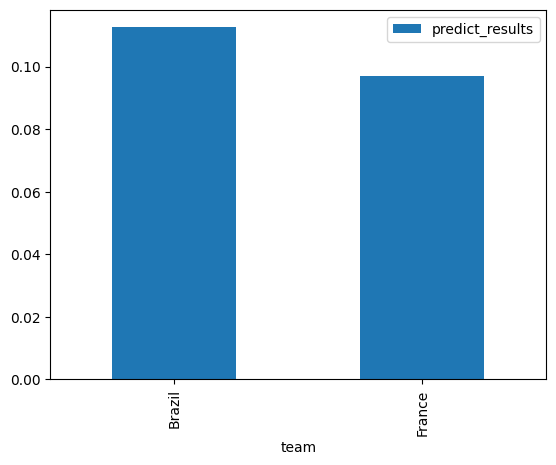

In [6669]:
FinalGame1_December14.reset_index().plot.bar(x="team", y="predict_results")

In [6670]:
WinnersOfFIFA2022WorldCup = FinalGame1_December14.sort_values("predict_results", ascending = False).head(n = 1)
WinnersOfFIFA2022WorldCup

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603


In [6671]:
dfgame1candidate1 = dfcandidate[dfcandidate.team == "Japan"]
dfgame1candidate1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


In [6672]:
dfgame1candidate2 = dfcandidate[dfcandidate.team == "Spain"]
dfgame1candidate2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062222


In [6673]:
frameA = [dfgame1candidate1, dfgame1candidate2]
game1 = pd.concat(frameA)
game1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062222


<AxesSubplot: xlabel='team'>

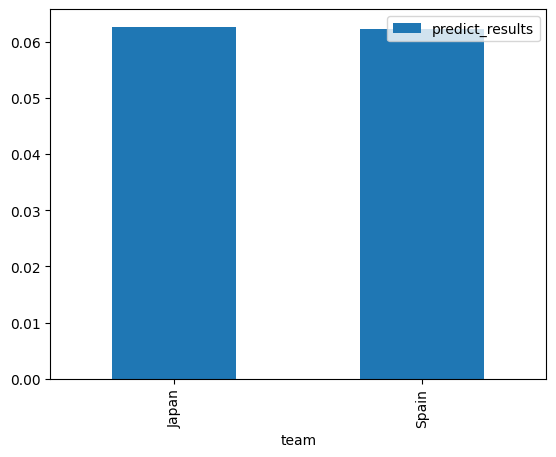

In [6674]:
game1.reset_index().plot.bar(x="team", y="predict_results")

In [6675]:
WinnerOfGame1 = game1.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame1

c:\Users\August Hu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643


In [6676]:
dfgame2candidate1 = dfcandidate[dfcandidate.team == "Costa Rica"]
dfgame2candidate1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
26,26,2022-12-14 20:55:37 UTC,Costa Rica,E,52.66186,1.3806,1.05339,1.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.036911


In [6677]:
dfgame2candidate2 = dfcandidate[dfcandidate.team == "Germany"]
dfgame2candidate2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155


In [6678]:
frameB = [dfgame2candidate1, dfgame2candidate2]
game2 = pd.concat(frameB)
game2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
26,26,2022-12-14 20:55:37 UTC,Costa Rica,E,52.66186,1.38060,1.05339,1.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.036911
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155


<AxesSubplot: xlabel='team'>

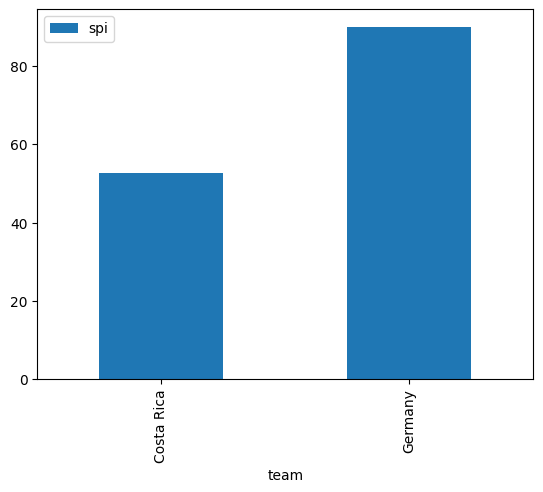

In [6679]:
game2.reset_index().plot.bar(x="team", y="spi")

In [6680]:
WinnerOfGame2 = game2.sort_values("predict_results", ascending = False).head(n = 1)
WinnerOfGame2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.068155


In [6681]:
frameR16 = [dfA16, dfB16, dfC16, dfD16, dfE16, dfF16, dfG16, dfH16]
RoundOf16Candidate = pd.concat(frameR16)
RoundOf16Candidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642
12,12,2022-12-14 20:55:37 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.023092
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994
21,21,2022-12-14 20:55:37 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.025025
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.029704
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.068155
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643


In [6682]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]], dfteam1["make_round_of_16"])
dfteam1["predict_ChanceOfRoundOf16"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763


In [6683]:
dfCandidate = dfteam1.sort_values("predict_ChanceOfRoundOf16", ascending = False)
dfCandidate

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.063969,0.849268
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420


In [6684]:
dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]
dfgroupHcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\346358755.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate1 = dfCandidate[dfcandidate.team == "South Korea"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
14,14,2022-12-14 20:55:37 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.018916,0.44214


In [6685]:
dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]
dfgroupHcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3815101000.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate2 = dfCandidate[dfcandidate.team == "Portugal"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839


In [6686]:
frameH1 = [dfgroupHcandidate1, dfgroupHcandidate2]
gameH1 = pd.concat(frameH1)
gameH1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
14,14,2022-12-14 20:55:37 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.018916,0.442140
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839


<AxesSubplot: xlabel='team'>

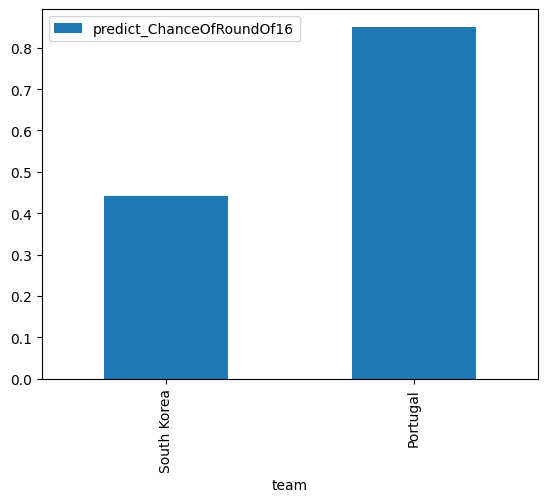

In [6687]:
gameH1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [6688]:
WinnerOfGameH1 = gameH1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839


In [6689]:
dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]
dfgroupHcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1798223390.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate3 = dfCandidate[dfcandidate.team == "Ghana"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
25,25,2022-12-14 20:55:37 UTC,Ghana,H,60.56379,1.60095,0.92839,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.015461,0.341609


In [6690]:
dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]
dfgroupHcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\2481320698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupHcandidate4 = dfCandidate[dfcandidate.team == "Uruguay"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848,0.426213


In [6691]:
frameH2 = [dfgroupHcandidate3, dfgroupHcandidate4]
gameH2 = pd.concat(frameH2)
gameH2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
25,25,2022-12-14 20:55:37 UTC,Ghana,H,60.56379,1.60095,0.92839,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.015461,0.341609
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848,0.426213


<AxesSubplot: xlabel='team'>

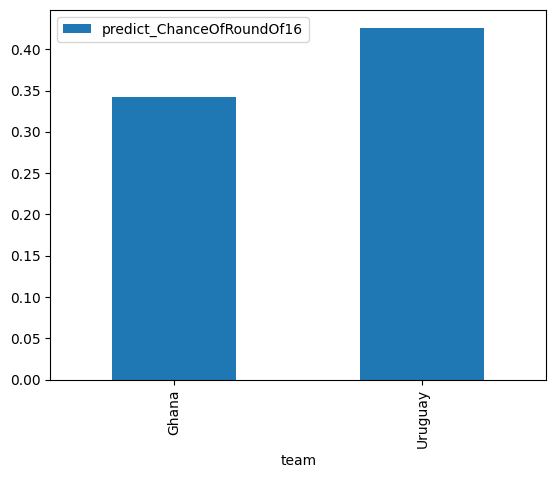

In [6692]:
gameH2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [6693]:
WinnerOfGameH2 = gameH2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameH2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.039848,0.426213


In [6694]:
dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]
dfgroupGcandidate1

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1947669684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate1 = dfCandidate[dfcandidate.team == "Serbia"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
28,28,2022-12-14 20:55:37 UTC,Serbia,G,73.86747,2.23251,0.85078,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.010725,-0.155045


In [6695]:
dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]
dfgroupGcandidate2

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\4265024335.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate2 = dfCandidate[dfcandidate.team == "Switzerland"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969,0.849268


In [6696]:
frameG1 = [dfgroupGcandidate1, dfgroupGcandidate2]
gameG1 = pd.concat(frameG1)
gameG1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
28,28,2022-12-14 20:55:37 UTC,Serbia,G,73.86747,2.23251,0.85078,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,-0.010725,-0.155045
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969,0.849268


<AxesSubplot: xlabel='team'>

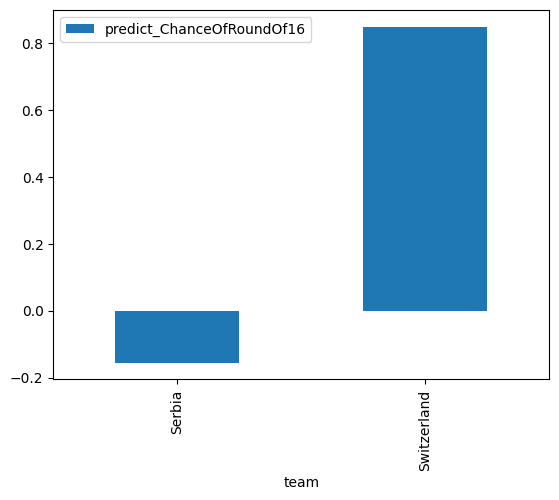

In [6697]:
gameG1.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [6698]:
WinnerOfGameG1 = gameG1.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969,0.849268


In [6699]:
dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]
dfgroupGcandidate3

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\1978172570.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate3 = dfCandidate[dfcandidate.team == "Cameroon"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
20,20,2022-12-14 20:55:37 UTC,Cameroon,G,66.37195,1.77502,0.83343,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.001778,0.472956


In [6700]:
dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]
dfgroupGcandidate4

C:\Users\August Hu\AppData\Local\Temp\ipykernel_29708\3700774475.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfgroupGcandidate4 = dfCandidate[dfcandidate.team == "Brazil"]


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842


In [6701]:
frameG2 = [dfgroupGcandidate3, dfgroupGcandidate4]
gameG2 = pd.concat(frameG2)
gameG2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
20,20,2022-12-14 20:55:37 UTC,Cameroon,G,66.37195,1.77502,0.83343,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.001778,0.472956
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.848420


<AxesSubplot: xlabel='team'>

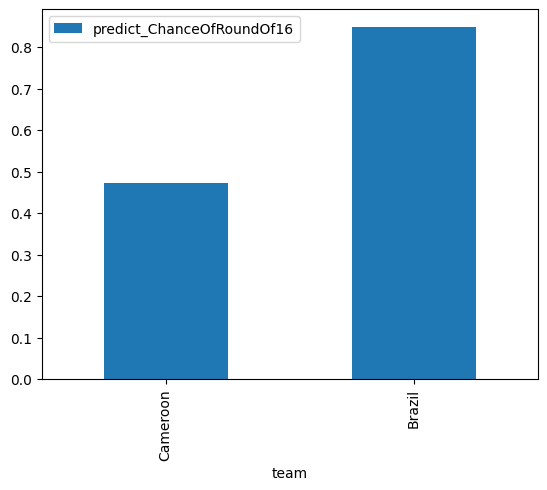

In [6702]:
gameG2.reset_index().plot.bar(x="team", y="predict_ChanceOfRoundOf16")

In [6703]:
WinnerOfGameG2 = gameG2.sort_values("predict_ChanceOfRoundOf16", ascending = False).head(n = 1)
WinnerOfGameG2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842


In [6704]:
model = LinearRegression()
model = model.fit(dfteam1[[ "spi", "goals_scored", "make_round_of_16"]], dfteam1["make_quarters"])
dfteam1["predict_ChanceOfQuarters"] = model.predict(dfteam1[[ "spi", "goals_scored", "make_round_of_16"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508


In [6705]:
dfCandidateQ = dfteam1.sort_values("predict_ChanceOfQuarters", ascending = False)
dfCandidateQ

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062222,0.764464,0.681393
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.063969,0.849268,0.445036
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344


In [6706]:
dfQuarter1 = dfCandidateQ[dfCandidateQ.team == "Netherlands"]
dfQuarter1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565


In [6707]:
dfQuarter2 = dfCandidateQ[dfCandidateQ.team == "USA"]
dfQuarter2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
12,12,2022-12-14 20:55:37 UTC,USA,B,73.394,1.95077,0.6716,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.023092,0.532086,0.376554


In [6708]:
frameQ1 = [dfQuarter1, dfQuarter2]
gameQ1 = pd.concat(frameQ1)
gameQ1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565
12,12,2022-12-14 20:55:37 UTC,USA,B,73.39400,1.95077,0.6716,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.023092,0.532086,0.376554


<AxesSubplot: xlabel='team'>

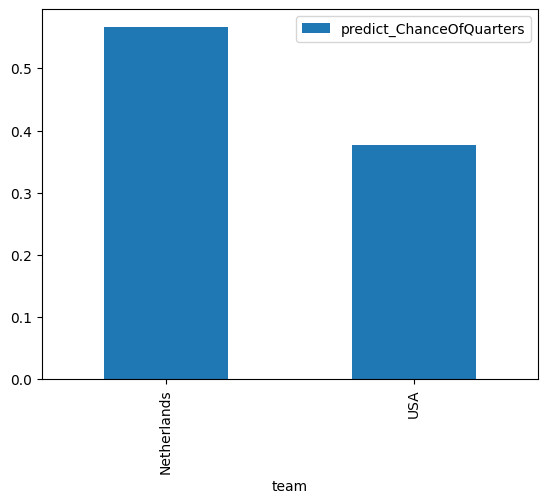

In [6709]:
gameQ1.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6710]:
WinnerOfGameQ1 = gameQ1.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565


In [6711]:
dfQuarter3 = dfCandidateQ[dfCandidateQ.team == "Argentina"]
dfQuarter3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164


In [6712]:
dfQuarter4 = dfCandidateQ[dfCandidateQ.team == "Australia"]
dfQuarter4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.029704,0.770246,0.256745


In [6713]:
frameQ2 = [dfQuarter3, dfQuarter4]
gameQ2 = pd.concat(frameQ2)
gameQ2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164
11,11,2022-12-14 20:55:37 UTC,Australia,D,64.25889,1.62507,0.79797,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.029704,0.770246,0.256745


<AxesSubplot: xlabel='team'>

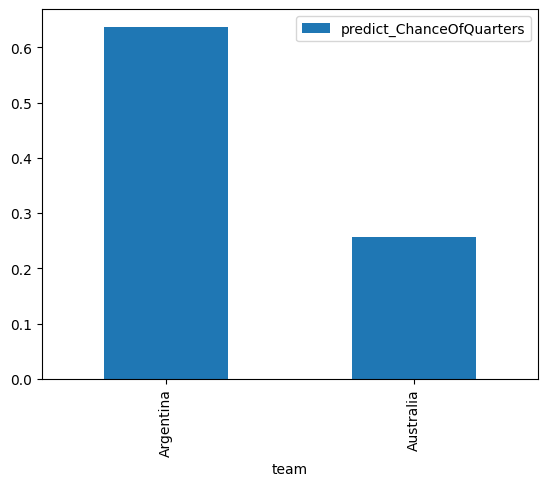

In [6714]:
gameQ2.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6715]:
WinnerOfGameQ2 = gameQ2.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164


In [6716]:
dfQuarter5 = dfCandidateQ[dfCandidateQ.team == "Japan"]
dfQuarter5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344


In [6717]:
dfQuarter6 = dfCandidateQ[dfCandidateQ.team == "Croatia"]
dfQuarter6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758


In [6718]:
frameQ3 = [dfQuarter5, dfQuarter6]
gameQ3 = pd.concat(frameQ3)
gameQ3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758


<AxesSubplot: xlabel='team'>

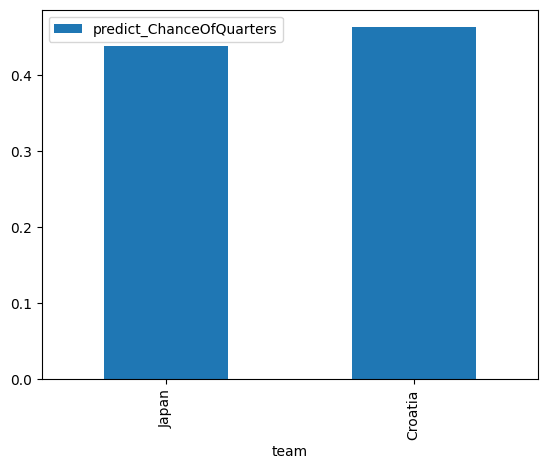

In [6719]:
gameQ3.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6720]:
WinnerOfGameQ3 = gameQ3.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758


In [6721]:
dfQuarter7 = dfCandidateQ[dfCandidateQ.team == "Brazil"]
dfQuarter7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842,0.675196


In [6722]:
dfQuarter8 = dfCandidateQ[dfCandidateQ.team == "South Korea"]
dfQuarter8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
14,14,2022-12-14 20:55:37 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.018916,0.44214,0.386138


In [6723]:
frameQ4 = [dfQuarter7, dfQuarter8]
gameQ4 = pd.concat(frameQ4)
gameQ4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842,0.675196
14,14,2022-12-14 20:55:37 UTC,South Korea,H,72.35291,1.95504,0.71893,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.018916,0.44214,0.386138


<AxesSubplot: xlabel='team'>

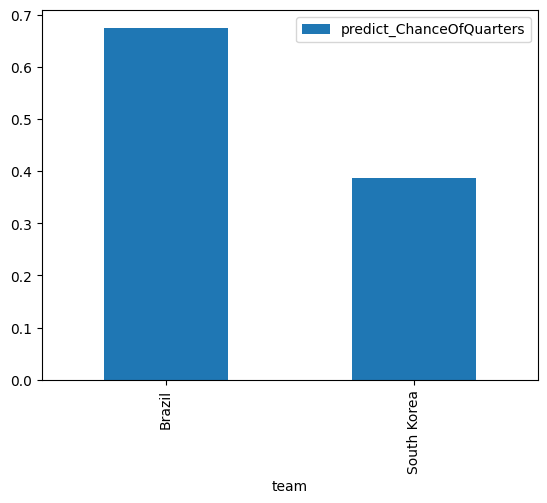

In [6724]:
gameQ4.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6725]:
WinnerOfGameQ4 = gameQ4.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842,0.675196


In [6726]:
dfQuarter9 = dfCandidateQ[dfCandidateQ.team == "France"]
dfQuarter9

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076


In [6727]:
dfQuarter10 = dfCandidateQ[dfCandidateQ.team == "Poland"]
dfQuarter10

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
15,15,2022-12-14 20:55:37 UTC,Poland,C,68.04764,1.84609,0.8194,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.007772,0.483888,0.299224


In [6728]:
frameQ5 = [dfQuarter9, dfQuarter10]
gameQ5 = pd.concat(frameQ5)
gameQ5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076
15,15,2022-12-14 20:55:37 UTC,Poland,C,68.04764,1.84609,0.81940,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.007772,0.483888,0.299224


<AxesSubplot: xlabel='team'>

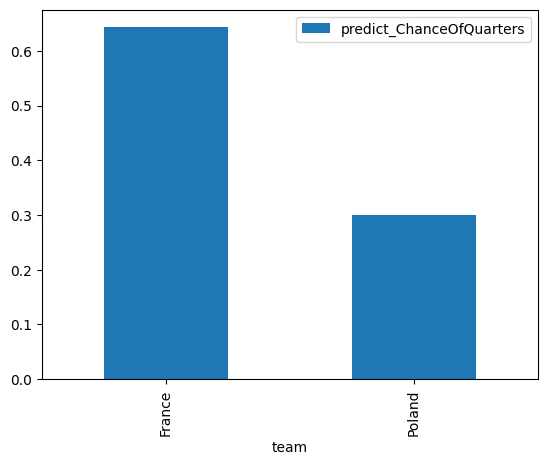

In [6729]:
gameQ5.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6730]:
WinnerOfGameQ5 = gameQ5.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076


In [6731]:
dfQuarter11 = dfCandidateQ[dfCandidateQ.team == "England"]
dfQuarter11

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478


In [6732]:
dfQuarter12 = dfCandidateQ[dfCandidateQ.team == "Senegal"]
dfQuarter12

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508


In [6733]:
frameQ6 = [dfQuarter11, dfQuarter12]
gameQ6 = pd.concat(frameQ6)
gameQ6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508


<AxesSubplot: xlabel='team'>

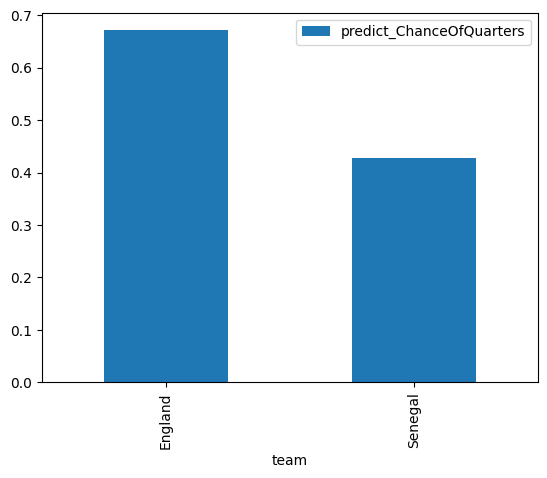

In [6734]:
gameQ6.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6735]:
WinnerOfGameQ6 = gameQ6.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478


In [6736]:
dfQuarter13 = dfCandidateQ[dfCandidateQ.team == "Morocco"]
dfQuarter13

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.01365,0.408845


In [6737]:
dfQuarter14 = dfCandidateQ[dfCandidateQ.team == "Spain"]
dfQuarter14

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062222,0.764464,0.681393


In [6738]:
frameQ7 = [dfQuarter13, dfQuarter14]
gameQ7 = pd.concat(frameQ7)
gameQ7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062222,0.764464,0.681393


<AxesSubplot: xlabel='team'>

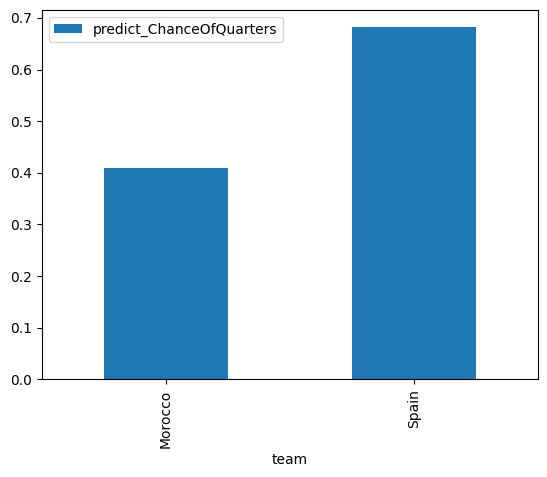

In [6739]:
gameQ7.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6740]:
WinnerOfGameQ7 = gameQ7.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.062222,0.764464,0.681393


In [6741]:
dfQuarter15 = dfCandidateQ[dfCandidateQ.team == "Portugal"]
dfQuarter15

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978


In [6742]:
dfQuarter16 = dfCandidateQ[dfCandidateQ.team == "Switzerland"]
dfQuarter16

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969,0.849268,0.445036


In [6743]:
frameQ8 = [dfQuarter15, dfQuarter16]
gameQ8 = pd.concat(frameQ8)
gameQ8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.063969,0.849268,0.445036


<AxesSubplot: xlabel='team'>

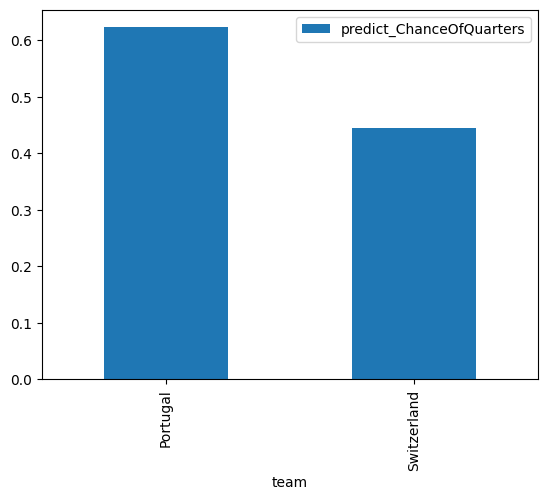

In [6744]:
gameQ8.reset_index().plot.bar(x="team", y="predict_ChanceOfQuarters")

In [6745]:
WinnerOfGameQ8 = gameQ8.sort_values("predict_ChanceOfQuarters", ascending = False).head(n = 1)
WinnerOfGameQ8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978


In [6746]:
frame_ROUNDOF16 = [WinnerOfGameQ1, WinnerOfGameQ2, WinnerOfGameQ3, WinnerOfGameQ4, WinnerOfGameQ5, WinnerOfGameQ6, WinnerOfGameQ7, WinnerOfGameQ8]
WinnersOfRound16 = pd.concat(frame_ROUNDOF16)
WinnersOfRound16

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478
13,13,2022-12-14 20:55:37 UTC,Spain,E,88.50675,2.59723,0.34458,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062222,0.764464,0.681393
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978


In [6747]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters"]], dfteam1["make_semis"])
dfteam1["predict_ChanceOfSemi"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344,-0.046778
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508,-0.053987


In [6748]:
dfCandidateS = dfteam1.sort_values("predict_ChanceOfSemi", ascending = False)
dfCandidateS

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026
31,31,2022-12-14 20:55:37 UTC,Qatar,A,48.19173,1.36459,1.23216,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,-0.081911,-0.210858,-0.326225,0.144313
15,15,2022-12-14 20:55:37 UTC,Poland,C,68.04764,1.84609,0.81940,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.007772,0.483888,0.299224,0.089316


In [6749]:
dfCandidateS1 = dfCandidateS[dfCandidateS.team == "Netherlands"]
dfCandidateS1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924


In [6750]:
dfCandidateS2 = dfCandidateS[dfCandidateS.team == "Argentina"]
dfCandidateS2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593


In [6751]:
dfCandidateS3 = dfCandidateS[dfCandidateS.team == "Croatia"]
dfCandidateS3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152


In [6752]:
dfCandidateS4 = dfCandidateS[dfCandidateS.team == "Brazil"]
dfCandidateS4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.122,0.28266,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.84842,0.675196,0.457268


In [6753]:
dfCandidateS5 = dfCandidateS[dfCandidateS.team == "England"]
dfCandidateS5

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938


In [6754]:
dfCandidateS6 = dfCandidateS[dfCandidateS.team == "France"]
dfCandidateS6

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876


In [6755]:
dfCandidateS7 = dfCandidateS[dfCandidateS.team == "Morocco"]
dfCandidateS7

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.01365,0.408845,0.572223


In [6756]:
dfCandidateS8 = dfCandidateS[dfCandidateS.team == "Portugal"]
dfCandidateS8

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026


In [6757]:
frameQF1 = [dfCandidateS1, dfCandidateS2]
gameQF1 = pd.concat(frameQF1)
gameQF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593


<AxesSubplot: xlabel='team'>

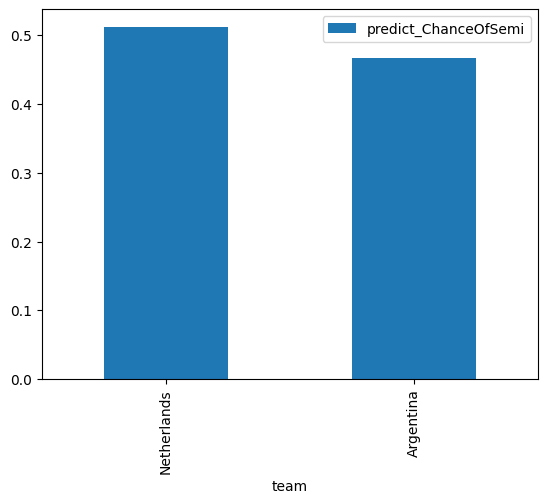

In [6758]:
gameQF1.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [6759]:
WinnerOfGameQF1 = gameQF1.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.5494,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924


In [6760]:
frameQF2 = [dfCandidateS3, dfCandidateS4]
gameQF2 = pd.concat(frameQF2)
gameQF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268


<AxesSubplot: xlabel='team'>

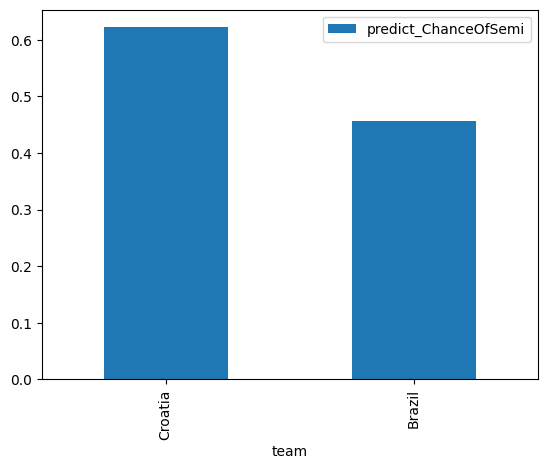

In [6761]:
gameQF2.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [6762]:
WinnerOfGameQF2 = gameQF2.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152


In [6763]:
frameQF3 = [dfCandidateS5, dfCandidateS6]
gameQF3 = pd.concat(frameQF3)
gameQF3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876


<AxesSubplot: xlabel='team'>

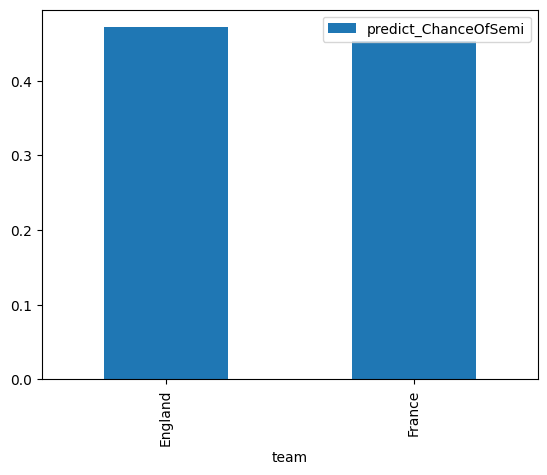

In [6764]:
gameQF3.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [6765]:
WinnerOfGameQF3 = gameQF3.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF3

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938


In [6766]:
frameQF4 = [dfCandidateS7, dfCandidateS8]
gameQF4 = pd.concat(frameQF4)
gameQF4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026


<AxesSubplot: xlabel='team'>

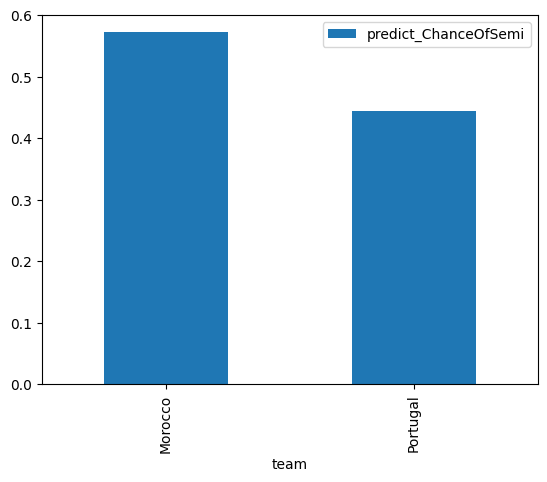

In [6767]:
gameQF4.reset_index().plot.bar(x="team", y="predict_ChanceOfSemi")

In [6768]:
WinnerOfGameQF4 = gameQF4.sort_values("predict_ChanceOfSemi", ascending = False).head(n = 1)
WinnerOfGameQF4

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.01365,0.408845,0.572223


In [6769]:
Frame_Predicted_Quarters = [WinnerOfGameQF1, WinnerOfGameQF2, WinnerOfGameQF3, WinnerOfGameQF4]
Predicted_Quarters_Teams = pd.concat(Frame_Predicted_Quarters)
Predicted_Quarters_Teams

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223


In [6770]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis"]], dfteam1["make_final"])
dfteam1["predict_ChanceOfFinal"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938,-0.067435
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924,-0.065356
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026,0.062280
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268,0.070510
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344,-0.046778,0.067715
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508,-0.053987,0.070397


In [6771]:
dfCandidateF = dfteam1.sort_values("predict_ChanceOfFinal", ascending = False)
dfCandidateF

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845
16,16,2022-12-14 20:55:37 UTC,Germany,E,89.95279,3.42799,0.66808,1.0,1.0,1.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.068155,0.407638,0.339412,-0.146263,0.177555
26,26,2022-12-14 20:55:37 UTC,Costa Rica,E,52.66186,1.38060,1.05339,1.0,0.0,2.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,-0.036911,-0.052580,-0.236926,-0.019658,0.083880
10,10,2022-12-14 20:55:37 UTC,Switzerland,G,76.42499,2.18629,0.70131,2.0,0.0,1.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.063969,0.849268,0.445036,-0.049544,0.072512
23,23,2022-12-14 20:55:37 UTC,Iran,B,68.30861,1.72082,0.71138,1.0,0.0,2.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.007327,0.235743,0.001709,-0.048775,0.070981
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,1.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268,0.070510
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508,-0.053987,0.070397


In [6772]:
frameSF1 = [dfCandidateF[dfCandidateF.team == "Argentina"], dfCandidateF[dfCandidateF.team == "Croatia"]]
gameSF1 = pd.concat(frameSF1)
gameSF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845


<AxesSubplot: xlabel='team'>

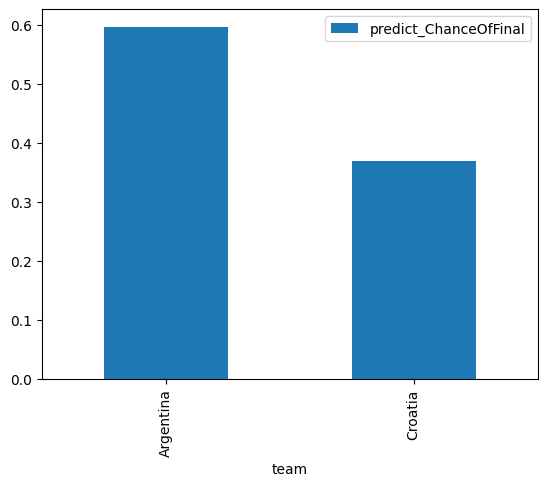

In [6773]:
gameSF1.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [6774]:
WinnerOfGameSF1 = gameSF1.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855


In [6775]:
frameSF2 = [dfCandidateF[dfCandidateF.team == "France"], dfCandidateF[dfCandidateF.team == "Morocco"]]
gameSF2 = pd.concat(frameSF2)
gameSF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475


<AxesSubplot: xlabel='team'>

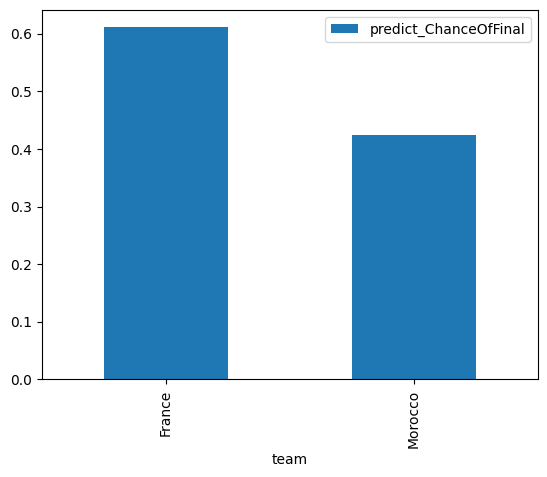

In [6776]:
gameSF2.reset_index().plot.bar(x="team", y="predict_ChanceOfFinal")

In [6777]:
WinnerOfGameSF2 = gameSF2.sort_values("predict_ChanceOfFinal", ascending = False).head(n = 1)
WinnerOfGameSF2

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825


In [6778]:
Frame_Predicted_Final = [WinnerOfGameSF1, WinnerOfGameSF2]
Predicted_Final = pd.concat(Frame_Predicted_Final)
Predicted_Final

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_quarters,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825


In [6779]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis", "make_final"]], dfteam1["win_league"])
dfteam1["predict_ChanceOfWinLeague"] = model.predict(dfteam1[["sim_wins", "spi", "goals_scored", "goals_against", "make_round_of_16", "make_quarters", "make_semis", "make_final"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855,0.500215
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825,0.499785
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475,0.000018
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,1.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845,-0.000018
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938,-0.067435,-0.000877
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924,-0.065356,0.000337
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026,0.062280,-0.000389
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268,0.070510,0.000930
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344,-0.046778,0.067715,0.000073
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508,-0.053987,0.070397,-0.000363


In [6780]:
dfCandidateW = dfteam1.sort_values("predict_ChanceOfWinLeague", ascending = False)
dfCandidateW

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855,0.500215
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825,0.499785
19,19,2022-12-14 20:55:37 UTC,Tunisia,D,67.83185,1.55967,0.60517,1.0,1.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.007751,0.494783,-0.042151,0.051637,-0.105857,0.001141
22,22,2022-12-14 20:55:37 UTC,Belgium,F,80.91900,2.43900,0.65161,1.0,1.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.045251,0.351608,0.147141,-0.042746,0.068553,0.001059
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268,0.070510,0.000930
12,12,2022-12-14 20:55:37 UTC,USA,B,73.39400,1.95077,0.67160,1.0,2.0,0.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.023092,0.532086,0.376554,0.073514,-0.089310,0.000855
27,27,2022-12-14 20:55:37 UTC,Denmark,D,76.68220,2.04580,0.59589,0.0,1.0,2.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,-0.000273,-0.054671,0.085860,0.038633,-0.029908,0.000818
18,18,2022-12-14 20:55:37 UTC,Uruguay,H,79.24157,2.08441,0.50927,1.0,1.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.039848,0.426213,0.135200,-0.032930,0.030992,0.000779
15,15,2022-12-14 20:55:37 UTC,Poland,C,68.04764,1.84609,0.81940,1.0,1.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.007772,0.483888,0.299224,0.089316,-0.106001,0.000666
21,21,2022-12-14 20:55:37 UTC,Mexico,C,74.06856,1.87596,0.59088,1.0,1.0,1.0,...,0.0,0.0,0.00000,2022-12-14 20:56:18 UTC,0.025025,0.377121,0.060378,-0.018164,0.016098,0.000591


In [6781]:
frameW1 = [dfCandidateW[dfCandidateW.team == "Argentina"], dfCandidateW[dfCandidateW.team == "France"]]
gameW1 = pd.concat(frameW1)
gameW1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855,0.500215
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825,0.499785


<AxesSubplot: xlabel='team'>

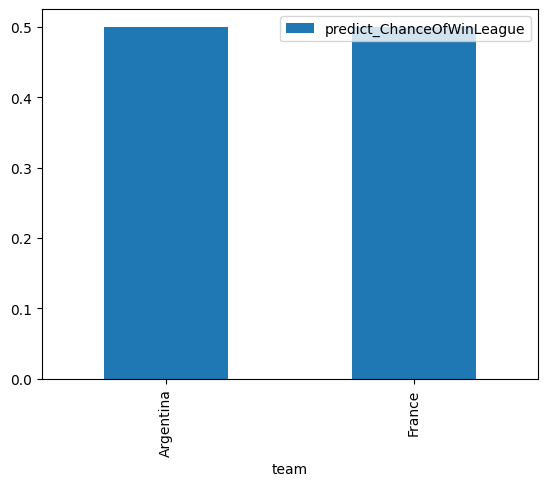

In [6782]:
gameW1.reset_index().plot.bar(x="team", y="predict_ChanceOfWinLeague")

In [6783]:
WinnerOfGameW1 = gameW1.sort_values("predict_ChanceOfWinLeague", ascending = False).head(n = 1)
WinnerOfGameW1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_semis,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855,0.500215


In [6784]:
model = LinearRegression()
model = model.fit(dfteam1[["sim_wins", "goals_scored", "goals_against", "sim_goal_diff", "global_o", "global_d" ]], dfteam1["spi"])
dfteam1["predict_ChanceOfThirdplace"] = model.predict(dfteam1[["sim_wins", "goals_scored", "goals_against", "sim_goal_diff", "global_o", "global_d"]])
dfteam1

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague,predict_ChanceOfThirdplace
0,0,2022-12-14 20:55:37 UTC,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,...,1.0,0.53049,2022-12-14 20:56:18 UTC,0.098994,0.926925,0.637164,0.466593,0.596855,0.500215,89.275663
1,1,2022-12-14 20:55:37 UTC,France,D,88.41321,2.89548,0.49957,2.0,0.0,1.0,...,1.0,0.46951,2022-12-14 20:56:18 UTC,0.097127,0.919425,0.643076,0.452876,0.610825,0.499785,88.487033
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475,0.000018,74.443786
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845,-0.000018,77.327152
4,4,2022-12-14 20:55:37 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093642,1.196105,0.671478,0.471938,-0.067435,-0.000877,88.608105
5,5,2022-12-14 20:55:37 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.085007,1.027818,0.566565,0.511924,-0.065356,0.000337,83.106404
6,6,2022-12-14 20:55:37 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.093146,0.850839,0.622978,0.445026,0.062280,-0.000389,86.216654
7,7,2022-12-14 20:55:37 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.112603,0.848420,0.675196,0.457268,0.070510,0.000930,96.629531
8,8,2022-12-14 20:55:37 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.062643,0.851652,0.438344,-0.046778,0.067715,0.000073,74.511049
9,9,2022-12-14 20:55:37 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,...,0.0,0.00000,2022-12-14 20:56:18 UTC,0.057657,0.849763,0.428508,-0.053987,0.070397,-0.000363,73.186243


In [6785]:
dfThirdONE = dfteam1[dfteam1["team"] == "Croatia"]
dfThirdONE

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague,predict_ChanceOfThirdplace
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845,-0.000018,77.327152


In [6786]:
dfThirdTwo = dfteam1[dfteam1["team"] == "Morocco"]
dfThirdTwo

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague,predict_ChanceOfThirdplace
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.01365,0.408845,0.572223,0.423475,0.000018,74.443786


In [6787]:
FrameThird = [dfThirdONE, dfThirdTwo]
THIRDGAME = pd.concat(FrameThird)
THIRDGAME


,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague,predict_ChanceOfThirdplace
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.65020,2.11658,0.60001,1.0,2.0,0.0,...,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845,-0.000018,77.327152
2,2,2022-12-14 20:55:37 UTC,Morocco,F,73.92282,1.73737,0.50047,2.0,1.0,0.0,...,0.0,0.0,2022-12-14 20:56:18 UTC,0.056799,1.013650,0.408845,0.572223,0.423475,0.000018,74.443786


<AxesSubplot: xlabel='team'>

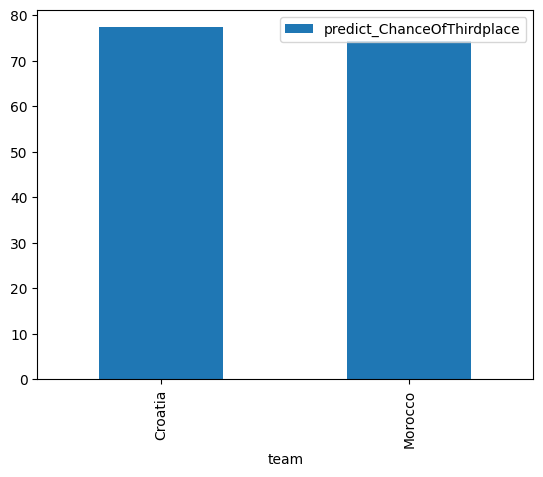

In [6788]:
THIRDGAME.reset_index().plot.bar(x="team", y="predict_ChanceOfThirdplace")

In [6789]:
THIRDGAME.sort_values("predict_ChanceOfThirdplace", ascending = False).head(n = 1)

,index,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,...,make_final,win_league,timestamp,predict_results,predict_ChanceOfRoundOf16,predict_ChanceOfQuarters,predict_ChanceOfSemi,predict_ChanceOfFinal,predict_ChanceOfWinLeague,predict_ChanceOfThirdplace
3,3,2022-12-14 20:55:37 UTC,Croatia,F,77.6502,2.11658,0.60001,1.0,2.0,0.0,...,0.0,0.0,2022-12-14 20:56:18 UTC,0.034095,0.642081,0.462758,0.622152,0.368845,-0.000018,77.327152
